In [8]:
from pycocotools import coco
import pandas as pd
import torch
from PIL import Image

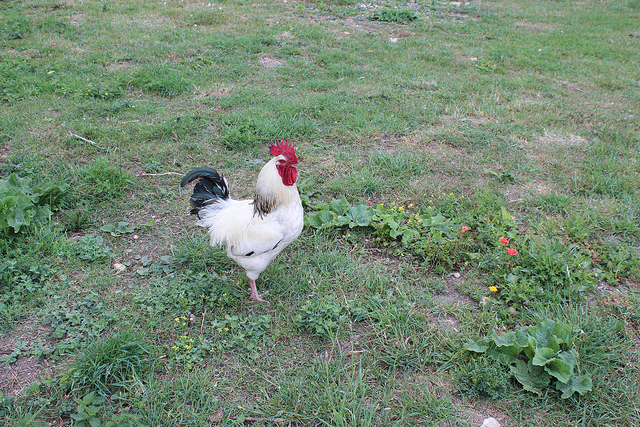

In [22]:
Image.open('../data/coco/images/COCO_train2014_000000285355.jpg')

In [5]:
sd_start_cp = torch.load('../output/coco_glu-gan2-s3_2020_11_04_19_43_59/Model/cap_model132.pth', map_location='cpu')

In [6]:
sd_start_cp.keys()

dict_keys(['model', 'optimizer', 'lr_scheduler'])

In [7]:
sd_start_cp['model'].keys()

odict_keys(['input_proj_v2.weight', 'input_proj_v2.bias', 'transformer.encoder.layers.0.self_attn.in_proj_weight', 'transformer.encoder.layers.0.self_attn.in_proj_bias', 'transformer.encoder.layers.0.self_attn.out_proj.weight', 'transformer.encoder.layers.0.self_attn.out_proj.bias', 'transformer.encoder.layers.0.linear1.weight', 'transformer.encoder.layers.0.linear1.bias', 'transformer.encoder.layers.0.linear2.weight', 'transformer.encoder.layers.0.linear2.bias', 'transformer.encoder.layers.0.norm1.weight', 'transformer.encoder.layers.0.norm1.bias', 'transformer.encoder.layers.0.norm2.weight', 'transformer.encoder.layers.0.norm2.bias', 'transformer.encoder.layers.1.self_attn.in_proj_weight', 'transformer.encoder.layers.1.self_attn.in_proj_bias', 'transformer.encoder.layers.1.self_attn.out_proj.weight', 'transformer.encoder.layers.1.self_attn.out_proj.bias', 'transformer.encoder.layers.1.linear1.weight', 'transformer.encoder.layers.1.linear1.bias', 'transformer.encoder.layers.1.linear2.

In [1]:
import os
import numpy as np

In [23]:
paths = []
for x in sorted(os.listdir('../output/coco_glu-gan2_2020_10_13_23_16_32/Model'),reverse=True):
    if 'netG' in x:
        paths.append(x)
paths

['netG_epoch_98.pth',
 'netG_epoch_96.pth',
 'netG_epoch_94.pth',
 'netG_epoch_92.pth',
 'netG_epoch_90.pth',
 'netG_epoch_88.pth',
 'netG_epoch_86.pth',
 'netG_epoch_84.pth',
 'netG_epoch_82.pth',
 'netG_epoch_80.pth',
 'netG_epoch_78.pth',
 'netG_epoch_76.pth',
 'netG_epoch_74.pth',
 'netG_epoch_72.pth',
 'netG_epoch_70.pth',
 'netG_epoch_68.pth',
 'netG_epoch_66.pth',
 'netG_epoch_64.pth',
 'netG_epoch_62.pth',
 'netG_epoch_60.pth',
 'netG_epoch_58.pth',
 'netG_epoch_56.pth',
 'netG_epoch_54.pth',
 'netG_epoch_52.pth',
 'netG_epoch_50.pth',
 'netG_epoch_48.pth',
 'netG_epoch_46.pth',
 'netG_epoch_44.pth',
 'netG_epoch_42.pth',
 'netG_epoch_40.pth',
 'netG_epoch_38.pth',
 'netG_epoch_36.pth',
 'netG_epoch_34.pth',
 'netG_epoch_32.pth',
 'netG_epoch_30.pth',
 'netG_epoch_28.pth',
 'netG_epoch_26.pth',
 'netG_epoch_24.pth',
 'netG_epoch_22.pth',
 'netG_epoch_120.pth',
 'netG_epoch_118.pth',
 'netG_epoch_116.pth',
 'netG_epoch_114.pth',
 'netG_epoch_112.pth',
 'netG_epoch_110.pth',
 'ne

In [10]:
from pycocotools import coco
c = coco.COCO(annotation_file = '../data/coco/annotations/captions_train2014.json')

# 'lung nodules - less data'
# 'MRI - generate missing modalities'
# 'MRI<->CT modality transfer'

# 'generating medical images - suspicious'

# - 'IoU measure'
# - 'N-ImageandTextRepresentation '

loading annotations into memory...
Done (t=1.16s)
creating index...
index created!


In [61]:
for k,v in c.anns.items():
    if 'stop sign' in v['caption']:
        print(v)
    else:
        continue

{'image_id': 385757, 'id': 15185, 'caption': 'A picture taken from the driver seat of car at a stop sign.'}
{'image_id': 385757, 'id': 19937, 'caption': 'stop sign in a rural area in the fall'}
{'image_id': 385757, 'id': 24779, 'caption': 'A car coming to a stop sign as seen from inside the car.'}
{'image_id': 385757, 'id': 27683, 'caption': 'Picture taken inside a car at a stop sign of fall foliage.'}
{'image_id': 99425, 'id': 114392, 'caption': 'A three wheeler and a motorcycle stopping at at stop sign.'}
{'image_id': 237568, 'id': 117446, 'caption': 'Person on a motorcycle coming up to a stop sign on the street.'}
{'image_id': 339974, 'id': 119796, 'caption': 'The electronic stop sign glows brightly at night time.'}
{'image_id': 67956, 'id': 125117, 'caption': 'Additional traffic rules are given below the stop sign.'}
{'image_id': 67956, 'id': 131120, 'caption': 'A stop sign on the corner with garbage cans'}
{'image_id': 67956, 'id': 135518, 'caption': 'A blue car makes a right turn

In [11]:
'COCO_train2014_000000183219.jpg'
'COCO_val2014_000000441614.jpg'
c.download(tarDir='../data/coco/downloaded_broken_images', imgIds=[285355])

downloaded 0/1 images (t=0.4s)


In [39]:
df = df.sort_values(by='image_id')

In [41]:
from datasets import prepare_data

In [14]:
cap = dset.Coco(root = '../data/coco/train2014',
                        annFile = '../data/coco/annotations/captions_train2014.json',
                        transform=transforms.ToTensor(),)

counter=0
print('Number of samples: ', len(cap))
img, target = cap[50] # load 4th sample
for img,target in cap:
    print("Image Size: ", img.size())
    print(len(target))
    if counter==10:
        break
    counter+=1

loading annotations into memory...
Done (t=0.57s)
creating index...
index created!
Number of samples:  82783
Image Size:  torch.Size([3, 480, 640])
5
Image Size:  torch.Size([3, 426, 640])
5
Image Size:  torch.Size([3, 428, 640])
5
Image Size:  torch.Size([3, 425, 640])
5
Image Size:  torch.Size([3, 640, 481])
5
Image Size:  torch.Size([3, 500, 381])
5
Image Size:  torch.Size([3, 488, 640])
5
Image Size:  torch.Size([3, 640, 480])
5
Image Size:  torch.Size([3, 426, 640])
5
Image Size:  torch.Size([3, 640, 427])
5
Image Size:  torch.Size([3, 375, 500])
5


In [9]:
DATA_DIR = '../'
image_transform = transforms.Compose([
        transforms.Scale(int(imsize * 76 / 64)),
        transforms.RandomCrop(imsize),
        transforms.RandomHorizontalFlip()])
dataset = TextDataset(DATA_DIR, 'train',
                          base_size=cfg.TREE.BASE_SIZE,
                          transform=image_transform)

In [ ]:
dataset = TextDataset(cfg.DATA_DIR, 'train',
                          base_size=cfg.TREE.BASE_SIZE,
                          transform=image_transform)


In [21]:
import shutil, os
from tqdm import tqdm_notebook
data = '../data/coco/downloaded_broken_images/'
files = os.listdir(data)
for file in tqdm_notebook(files):
#     break
    shutil.copy('{0}/{1}'.format(data,file), '../data/coco/images/')

In [51]:
import pandas as pd

In [62]:
cap_path = '../data/coco/text/COCO_train2014_000000232718.txt'

In [68]:
with open(cap_path, "r") as f:
    captions = f.read().split('\n')
    

In [74]:

og_img = '../data/coco/images/COCO_val2014_000000027755.jpg'
gen_img = '../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_108/valid/single/COCO_val2014_000000027755_s-1.png'

In [75]:
from PIL import Image

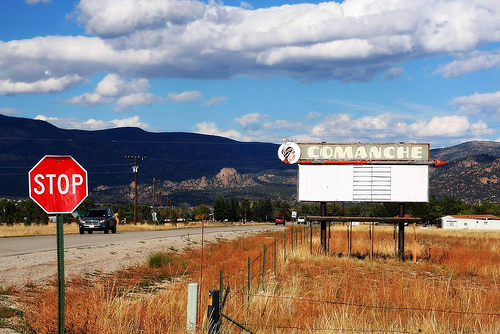

In [76]:
Image.open(og_img)

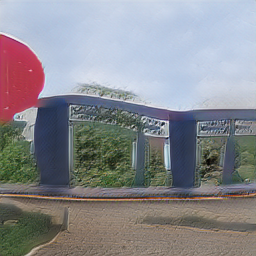

In [77]:
Image.open(gen_img)

In [124]:
len(pd.read_pickle('../data/coco/train/filenames.pickle'))

82783

In [125]:
t = 4
indices = torch.triu_indices(t, t, offset=1)

In [126]:
indices

tensor([[0, 0, 0, 1, 1, 2],
        [1, 2, 3, 2, 3, 3]])

In [32]:
import seaborn as sns
import pandas as pd

In [35]:
df = pd.read_csv('../TRX_GAN_COCO_Results.csv')

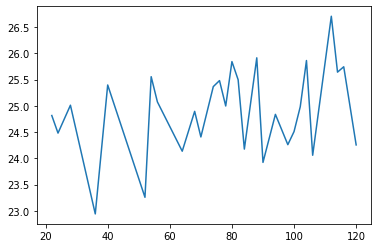

In [37]:
sns.lineplot(x=df['epoch'].values,y=df['score'].values, markers=True, dashes=False)


In [53]:
import torch
captions_lens = [2,1,3,5,4,0]
sorted_cap_lens, sorted_cap_indices = torch.sort(torch.tensor(captions_lens), 0, True)
sorted_cap_lens, sorted_cap_indices

(tensor([5, 4, 3, 2, 1, 0]), tensor([3, 4, 2, 0, 1, 5]))

In [4]:
from keras.datasets import cifar100

In [9]:
a,b = cifar100.load_data()

In [13]:
a[0].shape,a[1].shape

((50000, 32, 32, 3), (50000, 1))

In [15]:
from matplotlib import pyplot as plt

In [30]:
ids = [i for i, val in enumerate(a[1]==0) if val]

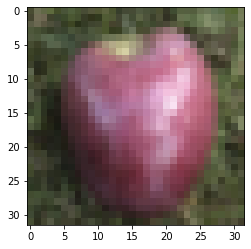